In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import webbrowser
import urllib
import urllib.request

In [2]:
df = pd.read_csv('dataset.csv')
print(df.head())
#df.describe()
df1 = pd.read_csv('Symptom-severity.csv')
print(df1.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [5]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.tail(10)

Disease            Symptom_1  \
4910                           Hypothyroidism              fatigue   
4911                          Hyperthyroidism              fatigue   
4912                             Hypoglycemia             vomiting   
4913                          Osteoarthristis           joint_pain   
4914                                Arthritis      muscle_weakness   
4915  (vertigo) Paroymsal  Positional Vertigo             vomiting   
4916                                     Acne            skin_rash   
4917                  Urinary tract infection  burning_micturition   
4918                                Psoriasis            skin_rash   
4919                                 Impetigo            skin_rash   

               Symptom_2             Symptom_3                 Symptom_4  \
4910         weight_gain  cold_hands_and_feets               mood_swings   
4911         mood_swings           weight_loss              restlessness   
4912             fatigue               anxiety                  sweating   
4913           neck_pain             knee_pain            hip_joint_pain   
4914          stiff_neck       swelling_joints        movement_stiffness   
4915            headache                nausea        spinning_movements   
4916  pus_filled_pimples            blackheads                  scurring   
4917  bladder_discomfort   foul_smell_of urine  continuous_feel_of_urine   
4918          joint_pain          skin_peeling       silver_like_dusting   
4919          high_fever               blister      red_sore_around_nose   

                 Symptom_5           Symptom_6                     Symptom_7  \
4910              lethargy           dizziness           puffy_face_and_eyes   
4911              sweating           diarrhoea               fast_heart_rate   
4912              headache              nausea  blurred_and_distorted_vision   
4913       swelling_joints     painful_walking                             0   
4914       painful_walking                   0                             0   
4915       loss_of_balance        unsteadiness                             0   
4916                     0                   0                             0   
4917                     0                   0                             0   
4918  small_dents_in_nails  inflammatory_nails                             0   
4919     yellow_crust_ooze                   0                             0   

             Symptom_8                 Symptom_9           Symptom_10  \
4910  enlarged_thyroid             brittle_nails  swollen_extremeties   
4911  excessive_hunger           muscle_weakness         irritability   
4912  excessive_hunger  drying_and_tingling_lips       slurred_speech   
4913                 0                         0                    0   
4914                 0                         0                    0   
4915                 0                         0                    0   
4916                 0                         0                    0   
4917                 0                         0                    0   
4918                 0                         0                    0   
4919                 0                         0                    0   

                 Symptom_11    Symptom_12             Symptom_13 Symptom_14  \
4910             depression  irritability  abnormal_menstruation          0   
4911  abnormal_menstruation             0                      0          0   
4912           irritability  palpitations                      0          0   
4913                      0             0                      0          0   
4914                      0             0                      0          0   
4915                      0             0                      0          0   
4916                      0             0                      0          0   
4917                      0             0                      0          0   
4918                      0       

In [6]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal infection          1          3          4          0          0   
1  Fungal infection          3          4          0          0          0   
2  Fungal infection          1          4          0          0          0   
3  Fungal infection          1          3          0          0          0   
4  Fungal infection          1          3          4          0          0   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   
2          0          0          0          0           0           0   
3          0          0          0          0           0           0   
4          0          0          0          0           0           0   

   Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

In [7]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['AIDS' 'Hypothyroidism' 'Arthritis' 'Hypothyroidism'
 '(vertigo) Paroymsal  Positional Vertigo' 'Alcoholic hepatitis' 'Malaria'
 '(vertigo) Paroymsal  Positional Vertigo' 'Diabetes' 'Hepatitis E'
 '(vertigo) Paroymsal  Positional Vertigo' 'Psoriasis' 'Tuberculosis'
 'Dimorphic hemmorhoids(piles)' 'Paralysis (brain hemorrhage)'
 'Chicken pox' 'Peptic ulcer diseae' 'Tuberculosis' 'Acne'
 'Hyperthyroidism' 'Arthritis' 'Pneumonia' 'Paralysis (brain hemorrhage)'
 'Hypertension' 'Drug Reaction' 'Dimorphic hemmorhoids(piles)'
 'Chicken pox' 'Acne' 'Hypoglycemia' 'Hypoglycemia' 'Heart attack'
 'Tuberculosis' 'Hepatitis D' 'Arthritis' 'Chicken pox'
 'Chronic cholestasis' 'Peptic ulcer diseae' 'Psoriasis' 'Pneumonia'
 'hepatitis A' 'Paralysis (brain hemorrhage)' 'Psoriasis' 'Chicken pox'
 'Dengue' 'Urinary tract infection' 'Diabetes' 'Hepatitis E' 'Hepatitis D'
 'Hyperthyroidism' 'Urinary tract infection' 'Osteoarthristis'
 'Hepatitis D' 'Varicose veins' 'Art

F1-score% = 93.30422811924424 | Accuracy% = 93.63143631436314


<AxesSubplot:>

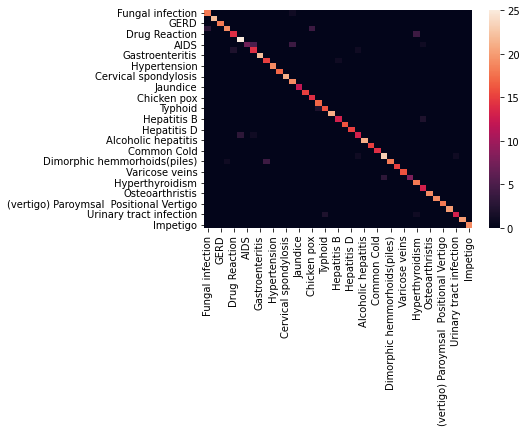

In [9]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [10]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("Oops!", "Symptoms cannot be empty.")
    else :
        SVM()

def SVM():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    loc = location.get()
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])

    if(pred2[0]=="GERD"):
        z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=OTV80O9NPC6K26AJ&field1=1&field2=0&field3='+str(loc))
        z.read()
    if(pred2[0]=="Hepatitis C"):
        r=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=OTV80O9NPC6K26AJ&field1=0&field2=1&field3='+str(loc))
        r.read()

In [11]:
root = Tk()
root.title(" Disease Prediction From Symptoms")
root.configure()

Symptom1 = StringVar()
Symptom1.set("Select")
Symptom2 = StringVar()
Symptom2.set("Select")
Symptom3 = StringVar()
Symptom3.set("Select")
Symptom4 = StringVar()
Symptom4.set("Select")
Symptom5 = StringVar()
Symptom5.set("Select")
location = StringVar()
location.set("Select")

w2 = Label(root, justify=CENTER, text=" \nSelect the Symptoms to Predict the Disease : ")
w2.config(font=("Helvetica", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(font=("Helvetica", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Helvetica", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Helvetica", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Helvetica", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Helvetica", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Helvetica", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

locLb = Label(root,  text="Location")
locLb.config(font=("Helvetica", 15))
locLb.grid(row=12, column=1, pady=10, sticky=W)

lr = Button(root,justify=CENTER, text="Predict",height=2, width=20, command=message)
lr.config(font=("Helvetica", 15))
lr.grid(row=15, column=1,pady=10)

#OPTIONS = sorted(symptoms)
OPTIONS = ["fatigue", "yellowish_skin", "loss_of_appetite", "yellowing_of_eyes", 'family_history',"stomach_pain", "ulcers_on_tongue", "vomiting", "cough", "chest_pain"]
LOCATIONS = ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru"]

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=1)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=1)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=1)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=1)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=1)

LocEn = OptionMenu(root, location,*LOCATIONS)
LocEn.grid(row=12, column=1)

t3 = Text(root, height=2, width=20)
t3.config(font=("Helvetica", 20))
t3.grid(row=19, column=1 , padx=10)

def callback(url):
   webbrowser.open_new_tab(url)

NameLb = Label(root,justify=LEFT, text="Click to view in Tableau Dashboard",fg="blue", cursor="hand2")
NameLb.config(font=("Helveticabold", 12))
NameLb.grid(row=21, column=1, pady=10,  sticky=W)
NameLb.bind("<Button-1>", lambda e:
callback("https://public.tableau.com/authoring/DiseasePredictionProject_16535417948410/Dashboard1#1"))


NameLbb = Label(root,justify=LEFT, text="Click to view live predictions",fg="blue", cursor="hand2")
NameLbb.config(font=("Helveticabold", 12))
NameLbb.grid(row=20, column=1, pady=10,  sticky=W)
NameLbb.bind("<Button-1>", lambda e:
callback("https://thingspeak.com/channels/1748546"))

NameLb3 = Label(root, text="Final Year Project by:- Aryan Pratap, Sachin Rampur and Namith Babu")
NameLb3.config(font=("Helvetica", 9))
NameLb3.grid(row=22, column=1, pady=10,  sticky=W)

root.mainloop()

Opening in existing browser session.
Opening in existing browser session.
